In [250]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
import tensorflow as tf

In [251]:
def plot_series(x,
                y,
                format="-",
                start=0,
                end=None, 
                title=None,
                xlabel=None, 
                ylabel=None, 
                legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      label (string) - tag for the line
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Create the graph figure dimensions
    plt.figure(figsize=(10, 6))
    
    # Identify the number of series to plot if there are more than two
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [32]:
sunspots_df=pd.read_csv('C:/Users/Dell/Desktop/Pipeline project/dataSnSp.csv')
sunspots_df.sample(5)

,year,month,day,decimal_year,sunspot_number
29648,1899,3,5,1899.174,0
203,1818,7,23,1818.558,52
16651,1863,8,4,1863.590,104
4151,1829,5,14,1829.366,-1
22188,1878,10,1,1878.749,0


In [160]:
sunspots_df.dtypes

year                int64
month               int64
day                 int64
decimal_year      float64
sunspot_number      int64
dtype: object

In [161]:
sunspots_df = sunspots_df.dropna()
sunspots_df = sunspots_df.reset_index(drop=True)

In [162]:
sunspots_df

,year,month,day,decimal_year,sunspot_number
0,1818,1,1,1818.001,-1
1,1818,1,2,1818.004,-1
2,1818,1,3,1818.007,-1
3,1818,1,4,1818.010,-1
4,1818,1,5,1818.012,-1
...,...,...,...,...,...
65526,1997,5,28,1997.404,23
65527,1997,5,29,1997.407,19
65528,1997,5,30,1997.410,17
65529,1997,5,31,1997.412,26


In [163]:
sunspots_df.isnull()

,year,month,day,decimal_year,sunspot_number
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
65526,False,False,False,False,False
65527,False,False,False,False,False
65528,False,False,False,False,False
65529,False,False,False,False,False


In [164]:
sunspots_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,65531.0,1907.209550,51.794327,1818.000,1862.0000,1907.000,1952.0000,1997.000
month,65531.0,6.514871,3.449503,1.000,4.0000,7.000,10.0000,12.000
day,65531.0,15.729472,8.800119,1.000,8.0000,16.000,23.0000,31.000
decimal_year,65531.0,1907.708873,51.793959,1818.001,1862.8545,1907.711,1952.5625,1997.412
sunspot_number,65531.0,80.505959,78.865619,-1.000,15.0000,59.000,127.0000,528.000



# Dataset Slicing

In [165]:
time_step = []
sunspots = []

In [166]:
sunspots = sunspots_df.loc[:, 'sunspot_number']
sunspots

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
65526    23
65527    19
65528    17
65529    26
65530    26
Name: sunspot_number, Length: 65531, dtype: int64

In [167]:
time = np.array(time_step)
series = np.array(sunspots)

In [168]:
series

array([-1, -1, -1, ..., 17, 26, 26], dtype=int64)

In [169]:
sunspots_df.groupby("year").agg(["min", "max", "std", "mean"])

month                         day                          decimal_year  \
       min max       std      mean min max       std       mean          min   
year                                                                           
1818     1  12  3.452584  6.526027   1  31  8.808321  15.720548     1818.001   
1819     1  12  3.452584  6.526027   1  31  8.808321  15.720548     1819.001   
1820     1  12  3.455958  6.513661   1  31  8.823592  15.756831     1820.001   
1821     1  12  3.452584  6.526027   1  31  8.808321  15.720548     1821.001   
1822     1  12  3.452584  6.526027   1  31  8.808321  15.720548     1822.001   
...    ...  ..       ...       ...  ..  ..       ...        ...          ...   
1993     1  12  3.452584  6.526027   1  31  8.808321  15.720548     1993.001   
1994     1  12  3.452584  6.526027   1  31  8.808321  15.720548     1994.001   
1995     1  12  3.452584  6.526027   1  31  8.808321  15.720548     1995.001   
1996     1  12  3.455958  6.513661   1  31  8.823592  15.756831     1996.001   
1997     1   5  1.432579  3.026316   1  31  8.839404  15.723684     1997.001   

                                      sunspot_number                  \
           max       std         mean            min  max        std   
year                                                                   
1818  1818.999  0.289069  1818.500000             -1  202  38.661217   
1819  1819.999  0.289069  1819.500000             -1  162  31.552445   
1820  1820.999  0.289075  1820.500000             -1  100  24.098900   
1821  1821.999  0.289069  1821.500000             -1   75  15.467362   
1822  1822.999  0.289069  1822.500000             -1   77  15.021953   
...        ...       ...          ...            ...  ...        ...   
1993  1993.999  0.289069  1993.500000             11  188  37.793890   
1994  1994.999  0.289069  1994.500000              0  153  28.720191   
1995  1995.999  0.289069  1995.500000              0   97  20.961176   
1996  1996.999  0.289075  1996.500000              0   79  13.599776   
1997  1997.412  0.120570  1997.208197              0   72  15.067687   

                 
           mean  
year             
1818  30.476712  
1819  25.969863  
1820  14.442623  
1821   7.479452  
1822   6.016438  
...         ...  
1993  76.095890  
1994  44.884932  
1995  25.073973  
1996  11.560109  
1997  15.894737  

[180 rows x 16 columns]

In [170]:
a=sunspots_df.groupby(['year']).sum()
t=a.sort_values(by='sunspot_number', ascending = False)
t['sunspot_number']

year
1957    98292
1958    95515
1870    84682
1959    82165
1979    80322
        ...  
1878     2081
1824     2046
1901     1674
1913      875
1823      595
Name: sunspot_number, Length: 180, dtype: int64

# Data Visualization

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

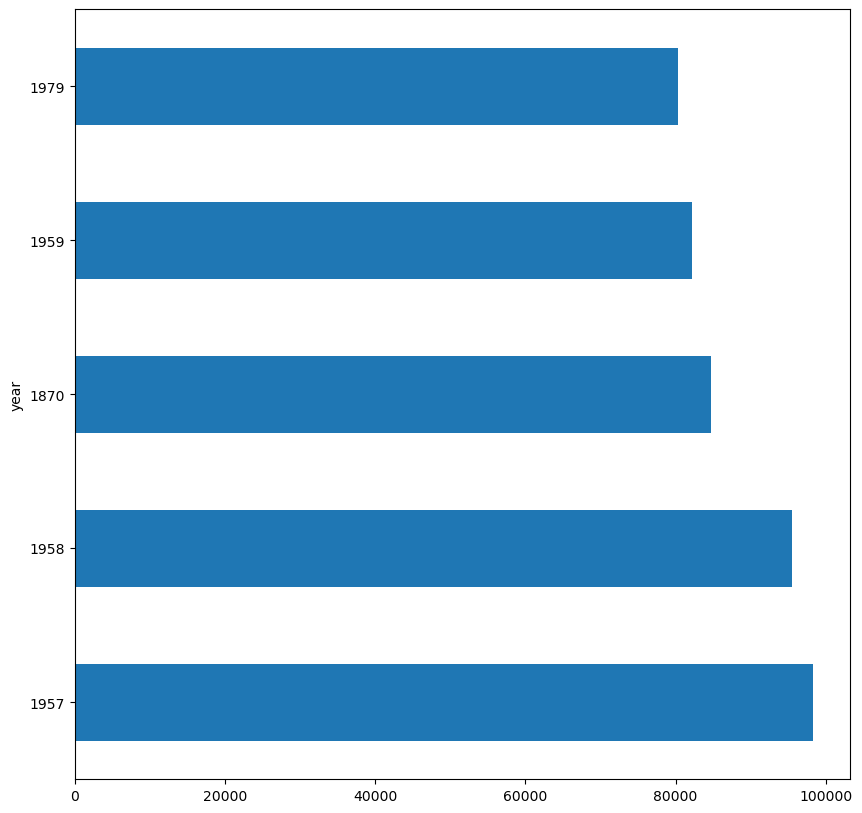

In [172]:
t['sunspot_number'].head(5).plot(kind='barh', figsize=(10,10))
yaxes="sunspot_number"

In [173]:
sunspots_dfcorr=sunspots_df.corr()
sunspots_dfcorr

,year,month,day,decimal_year,sunspot_number
year,1.000000,-0.004096,0.000020,0.999984,0.196905
month,-0.004096,1.000000,0.010549,0.001459,0.000340
day,0.000020,0.010549,1.000000,0.000544,-0.000806
decimal_year,0.999984,0.001459,0.000544,1.000000,0.196908
sunspot_number,0.196905,0.000340,-0.000806,0.196908,1.000000


<AxesSubplot:>

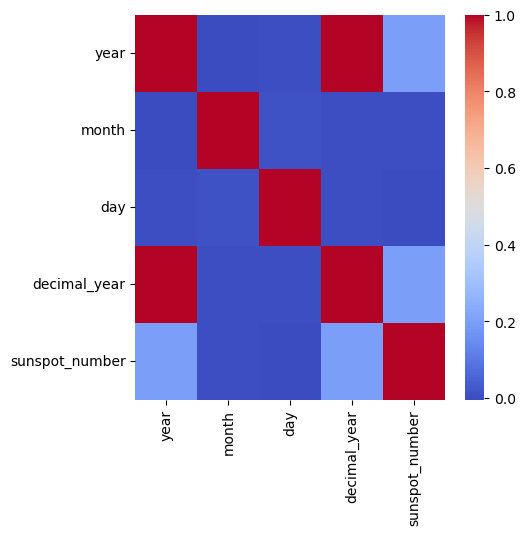

In [252]:
plt.figure(figsize=(5,5))
sns.heatmap(sunspots_dfcorr, cmap='coolwarm')

In [175]:
sunspots_df

,year,month,day,decimal_year,sunspot_number
0,1818,1,1,1818.001,-1
1,1818,1,2,1818.004,-1
2,1818,1,3,1818.007,-1
3,1818,1,4,1818.010,-1
4,1818,1,5,1818.012,-1
...,...,...,...,...,...
65526,1997,5,28,1997.404,23
65527,1997,5,29,1997.407,19
65528,1997,5,30,1997.410,17
65529,1997,5,31,1997.412,26


In [176]:
x = sunspots_df.drop(["sunspot_number","month","day"],axis=1)

In [177]:
x

,year,decimal_year
0,1818,1818.001
1,1818,1818.004
2,1818,1818.007
3,1818,1818.010
4,1818,1818.012
...,...,...
65526,1997,1997.404
65527,1997,1997.407
65528,1997,1997.410
65529,1997,1997.412


In [178]:
y= sunspots_df["sunspot_number"]
y=y.to_frame()
y

,sunspot_number
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
65526,23
65527,19
65528,17
65529,26


In [179]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
x_train.shape

(49148, 2)

In [183]:
y_train.shape

(49148, 1)

In [184]:
from sklearn.neural_network import MLPRegressor
neu = MLPRegressor(random_state=1, max_iter=450).fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
sunspots_df_new=pd.DataFrame(neu.predict(x_test))
pred_val= sunspots_df_new.rename(columns={0: 'Number of Sunspots'})
pred_val

,Number of Sunspots
0,94.460704
1,96.356277
2,93.334861
3,95.437133
4,101.137053
...,...
16378,99.257466
16379,93.371099
16380,92.776376
16381,96.554457


In [186]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("MLPRegressor's R2 Score:",r2_score(y_test, pred_val))

MLPRegressor's R2 Score: -0.023094673444686187


In [187]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

In [188]:
sunspots_df_new=pd.DataFrame(clf.predict(x_test))
pred_val= sunspots_df_new.rename(columns={0: 'Number of Sunspots'})
pred_val

,Number of Sunspots
0,21.0
1,87.0
2,27.0
3,125.0
4,69.0
...,...
16378,136.0
16379,0.0
16380,-1.0
16381,88.0


In [189]:
print("Decision Tree Regressor's R2 Score:",r2_score(y_test, pred_val))

Decision Tree Regressor's R2 Score: 0.7930309737746597


In [190]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [191]:
mean_absolute_error(y_test, pred_val)

19.323628151132272

In [192]:
pred_val.head(5)

,Number of Sunspots
0,21.0
1,87.0
2,27.0
3,125.0
4,69.0


In [193]:
y_test.head(5)

,sunspot_number
13378,21
26886,85
5340,32
20300,145
60757,44


In [194]:
sunspots_df=pd.read_csv('C:/Users/Dell/Desktop/Pipeline project/dataSnSp.csv')

In [195]:
print(sunspots_df.head())

   year  month  day  decimal_year  sunspot_number
0  1818      1    1      1818.001              -1
1  1818      1    2      1818.004              -1
2  1818      1    3      1818.007              -1
3  1818      1    4      1818.010              -1
4  1818      1    5      1818.012              -1


In [196]:
print(sunspots_df.tail())

       year  month  day  decimal_year  sunspot_number
65526  1997      5   28      1997.404              23
65527  1997      5   29      1997.407              19
65528  1997      5   30      1997.410              17
65529  1997      5   31      1997.412              26
65530  1997      5   31      1997.412              26


Text(0, 0.5, 'sunspot_number')

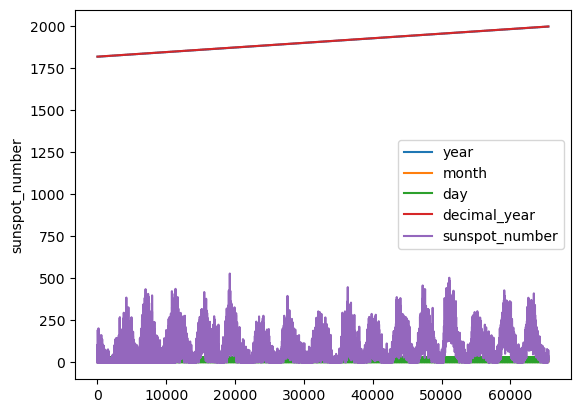

In [200]:
sunspots_df.plot()
plt.ylabel("sunspot_number")

# Data Plotting

In [210]:
def plotter(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Sunspots")

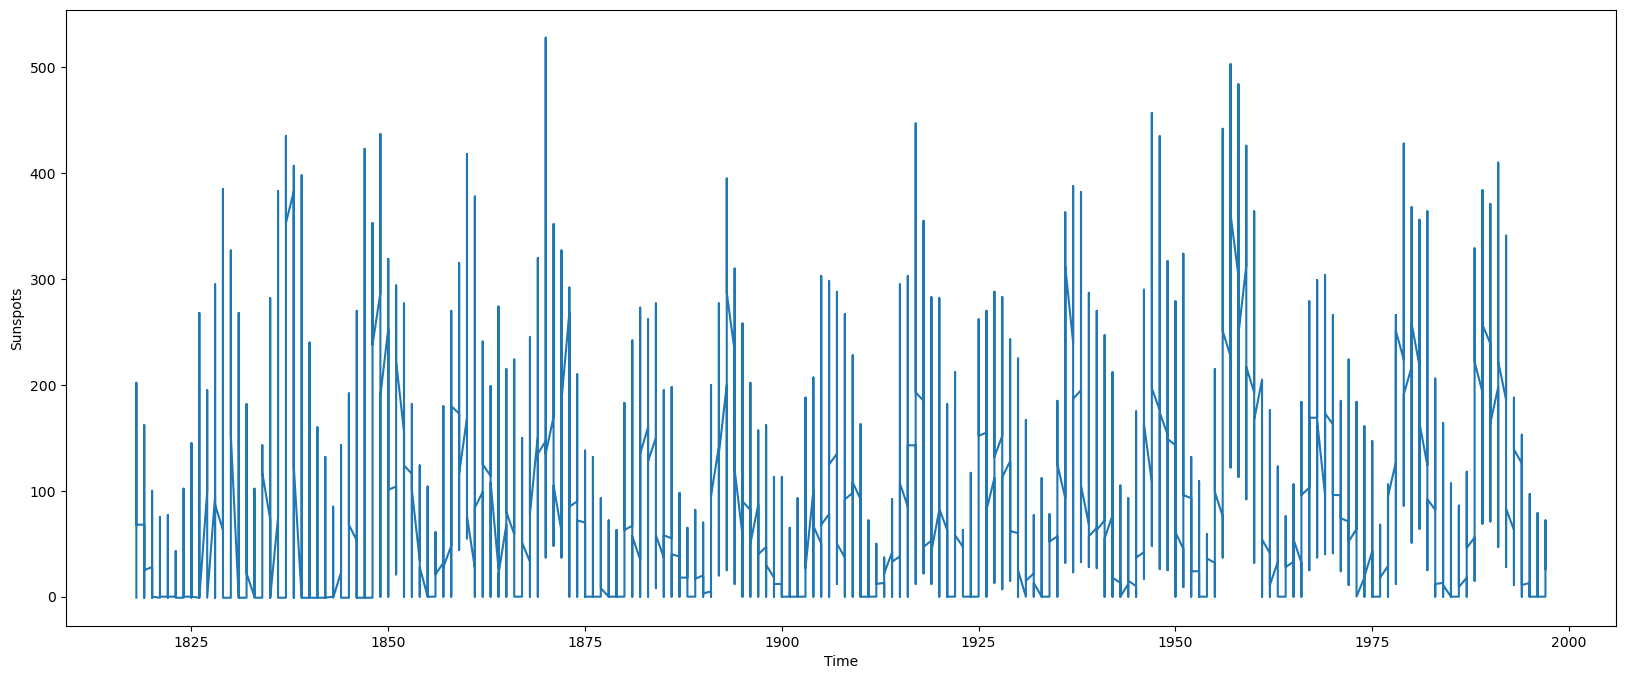

In [211]:
plt.figure(figsize = (20, 8))
plotter(time, series)

# Predicting Sunspots and time series data with an LSTM model

# LSTM Model A

In [231]:
import tensorflow as tf

window_size = 80
batch_size = 120
shuffle_buffer_size = 1000

In [232]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

In [233]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)

#Time series problems can be converted into machine learning problems by using the windowing operator.

#By using this method, we can train and optimize models using all of the extra tools and techniques available.

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

dataset = windowed_dataset(x_train, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# Define the model

model_A = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding='causal', activation='relu', input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model_A.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])

model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 64)          384       
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          33024     
                                                                 
 dense (Dense)               (None, None, 32)          2080      
                                                                 
 dense_1 (Dense)             (None, None, 16)          528       
                                                                 
 dense_2 (Dense)             (None, None, 1)           1

In [234]:
%%time 
history = model_A.fit(dataset, epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 15s 323ms/step - loss: 17.1892 - mae: 17.6628
Epoch 2/100
25/25 [==============================] - 8s 330ms/step - loss: 13.2858 - mae: 13.7221
Epoch 3/100
25/25 [==============================] - 8s 327ms/step - loss: 12.1360 - mae: 12.5496
Epoch 4/100
25/25 [==============================] - 9s 332ms/step - loss: 11.4612 - mae: 11.8802
Epoch 5/100
25/25 [==============================] - 9s 334ms/step - loss: 11.0122 - mae: 11.4183
Epoch 6/100
25/25 [==============================] - 9s 333ms/step - loss: 10.7230 - mae: 11.1373
Epoch 7/100
25/25 [==============================] - 8s 329ms/step - loss: 10.3639 - mae: 10.7530
Epoch 8/100
25/25 [==============================] - 8s 327ms/step - loss: 10.1259 - mae: 10.5049
Epoch 9/100
25/25 [==============================] - 9s 334ms/step - loss: 10.0852 - mae: 10.4576
Epoch 10/100
25/25 [==============================] - 9s 329ms/step - loss: 9.8767 - mae: 10.2493
Epoch 11/100
25/25 

25/25 [==============================] - 11s 424ms/step - loss: 3.0820 - mae: 3.3651
Epoch 86/100
25/25 [==============================] - 10s 393ms/step - loss: 3.1195 - mae: 3.4069
Epoch 87/100
25/25 [==============================] - 10s 376ms/step - loss: 3.0743 - mae: 3.3577
Epoch 88/100
25/25 [==============================] - 9s 344ms/step - loss: 3.1004 - mae: 3.3870
Epoch 89/100
25/25 [==============================] - 9s 345ms/step - loss: 3.1073 - mae: 3.3936
Epoch 90/100
25/25 [==============================] - 9s 364ms/step - loss: 3.0724 - mae: 3.3568
Epoch 91/100
25/25 [==============================] - 9s 370ms/step - loss: 3.0479 - mae: 3.3313
Epoch 92/100
25/25 [==============================] - 10s 405ms/step - loss: 3.0951 - mae: 3.3831
Epoch 93/100
25/25 [==============================] - 10s 395ms/step - loss: 3.0499 - mae: 3.3324
Epoch 94/100
25/25 [==============================] - 10s 386ms/step - loss: 3.0085 - mae: 3.2874
Epoch 95/100
25/25 [=================

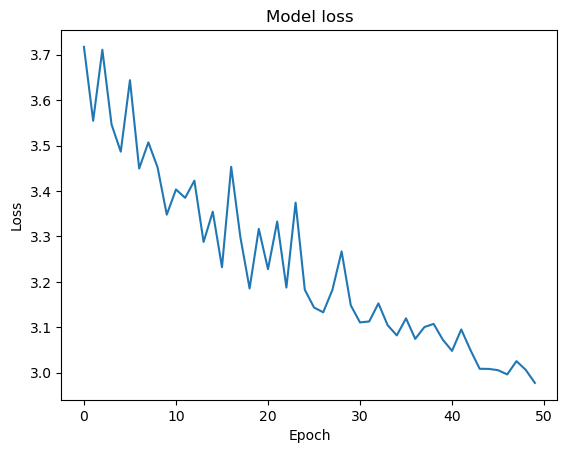

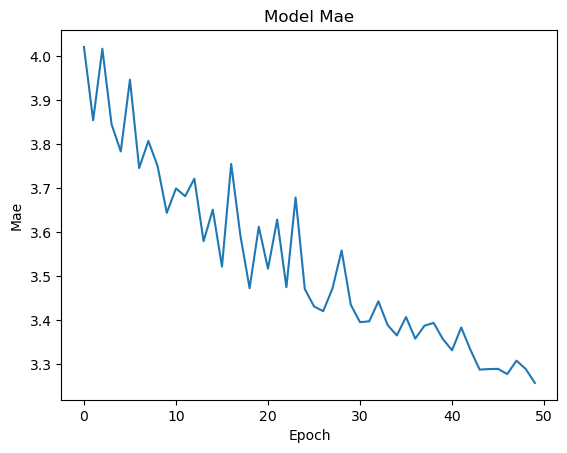

In [235]:
#Loss value plotting
plt.plot(history.history['loss'][50:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#Mae value plotting
plt.plot(history.history['mae'][50:])
plt.title('Model Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.show()

In [236]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [237]:
#Predict the outcome
rnn_forecast = model_forecast(model_A, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

2046/2046 [==============================] - 140s 67ms/step


In [260]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.title('Forecasting trend')
    plt.xlabel('Date')
    plt.ylabel('Monthly Mean Total Sunspot Number')

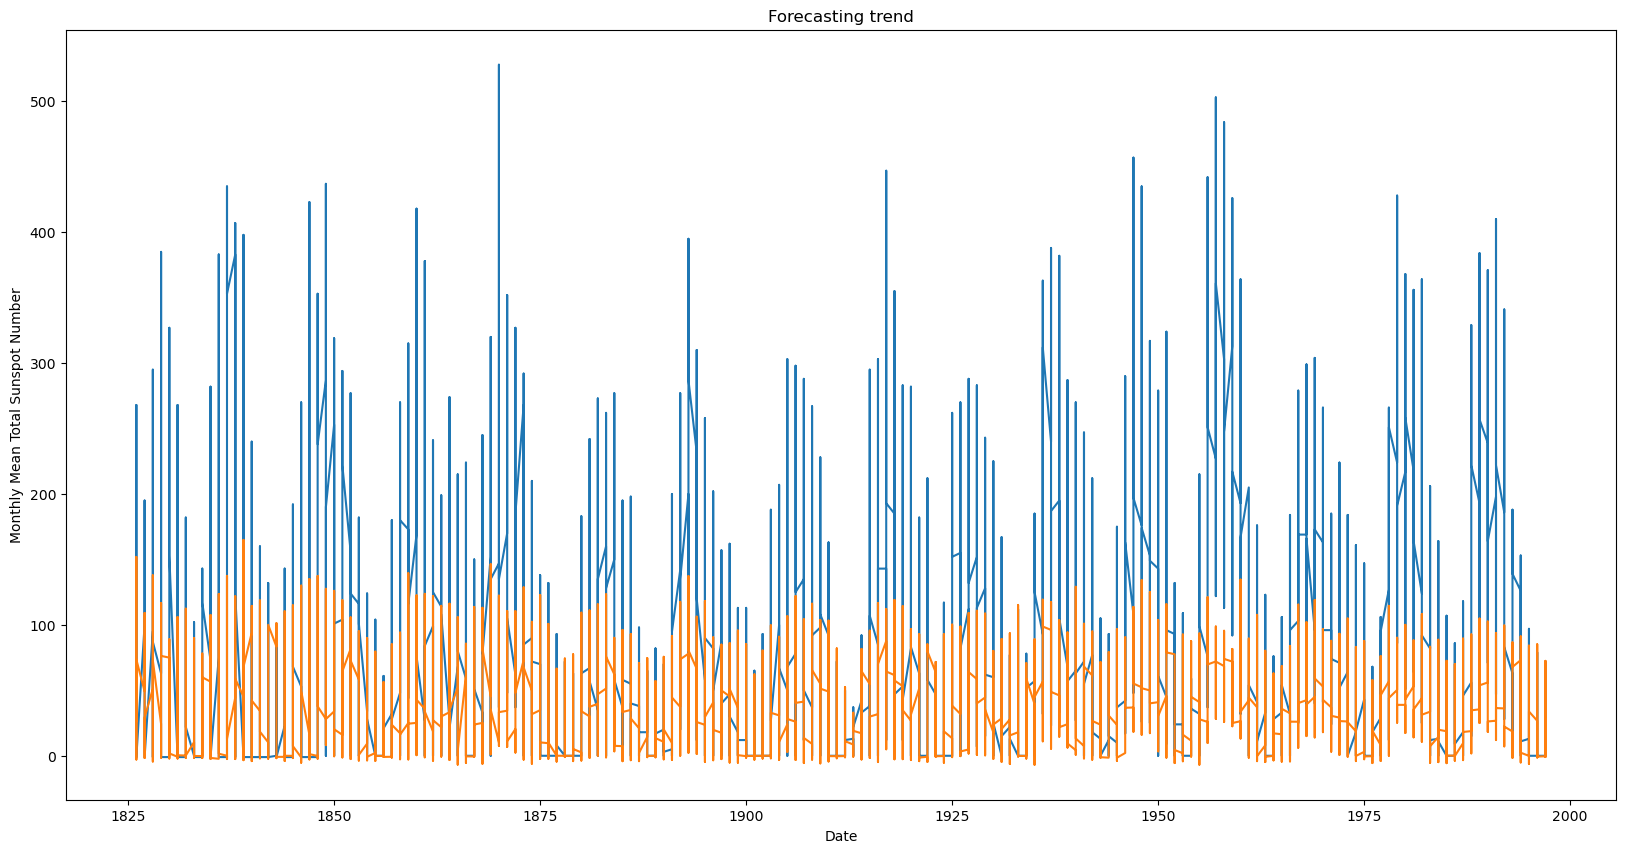

In [270]:
#Visualization of the entire dataset
plt.figure(figsize=(20,10))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.show()

In [241]:
results = np.array(rnn_forecast)

In [242]:
#Error mean calculation
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

47.72257

# LSTM Model B

In [244]:
#Parameter definition
window_size = 50
batch_size = 100
shuffle_buffer_size = 1000

In [245]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

In [247]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)

#Time series problems can be converted into machine learning problems by using the windowing operator.

#By using this method, we can train and optimize models using all of the extra tools and techniques available.

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

dataset = windowed_dataset(x_train, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

#Model definition

model_B = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding='causal', activation='relu', input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model_B.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])

model_B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 64)          384       
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          33024     
                                                                 
 dense (Dense)               (None, None, 32)          2080      
                                                                 
 dense_1 (Dense)             (None, None, 16)          528       
                                                                 
 dense_2 (Dense)             (None, None, 1)           1

In [248]:
%%time 
history = model_B.fit(dataset, epochs=100, verbose=1)

Epoch 1/100
30/30 [==============================] - 12s 161ms/step - loss: 15.7126 - mae: 16.1680
Epoch 2/100
30/30 [==============================] - 5s 157ms/step - loss: 12.6810 - mae: 13.1020
Epoch 3/100
30/30 [==============================] - 5s 156ms/step - loss: 11.9698 - mae: 12.3722
Epoch 4/100
30/30 [==============================] - 5s 157ms/step - loss: 11.4642 - mae: 11.8615
Epoch 5/100
30/30 [==============================] - 5s 158ms/step - loss: 11.0888 - mae: 11.4861
Epoch 6/100
30/30 [==============================] - 5s 157ms/step - loss: 10.7351 - mae: 11.1203
Epoch 7/100
30/30 [==============================] - 5s 174ms/step - loss: 10.4656 - mae: 10.8478
Epoch 8/100
30/30 [==============================] - 6s 203ms/step - loss: 10.3223 - mae: 10.7030
Epoch 9/100
30/30 [==============================] - 7s 219ms/step - loss: 10.1395 - mae: 10.5192
Epoch 10/100
30/30 [==============================] - 6s 186ms/step - loss: 10.0846 - mae: 10.4685
Epoch 11/100
30/30

30/30 [==============================] - 5s 158ms/step - loss: 3.5833 - mae: 3.8783
Epoch 86/100
30/30 [==============================] - 5s 158ms/step - loss: 3.5875 - mae: 3.8892
Epoch 87/100
30/30 [==============================] - 5s 157ms/step - loss: 3.5997 - mae: 3.9036
Epoch 88/100
30/30 [==============================] - 5s 157ms/step - loss: 3.5727 - mae: 3.8714
Epoch 89/100
30/30 [==============================] - 5s 157ms/step - loss: 3.5651 - mae: 3.8625
Epoch 90/100
30/30 [==============================] - 5s 159ms/step - loss: 3.5310 - mae: 3.8295
Epoch 91/100
30/30 [==============================] - 5s 158ms/step - loss: 3.5303 - mae: 3.8300
Epoch 92/100
30/30 [==============================] - 5s 157ms/step - loss: 3.4817 - mae: 3.7762
Epoch 93/100
30/30 [==============================] - 5s 158ms/step - loss: 3.5910 - mae: 3.9102
Epoch 94/100
30/30 [==============================] - 5s 158ms/step - loss: 3.5137 - mae: 3.8090
Epoch 95/100
30/30 [=======================

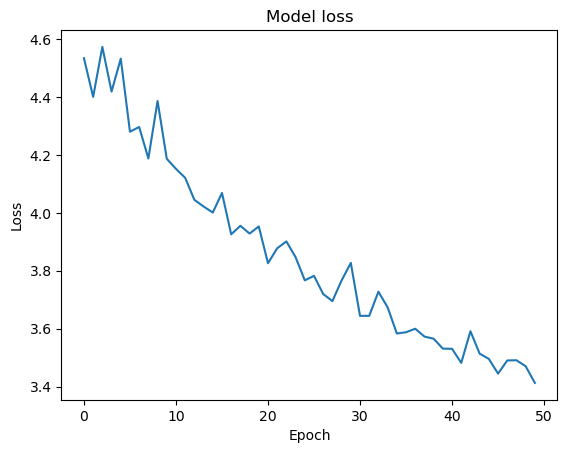

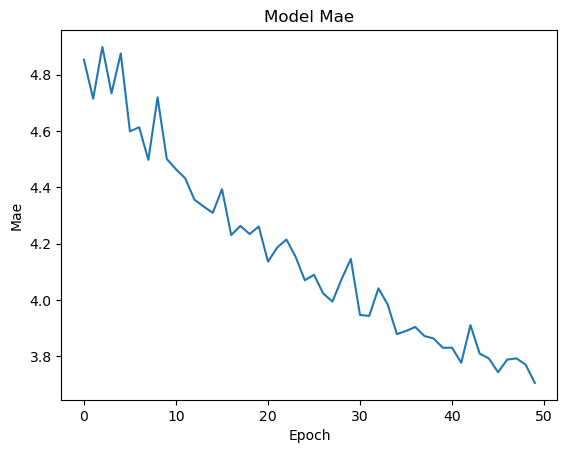

In [253]:
#Loss value plotting
plt.plot(history.history['loss'][50:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#Mae value plotting
plt.plot(history.history['mae'][50:])
plt.title('Model Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.show()

In [255]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w : w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [256]:
#Predict the outcome
rnn_forecast = model_forecast(model_2, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

2047/2047 [==============================] - 75s 36ms/step


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.title('Forecasting trend')
    plt.xlabel('Date')
    plt.ylabel('Monthly Mean Total Sunspot Number')

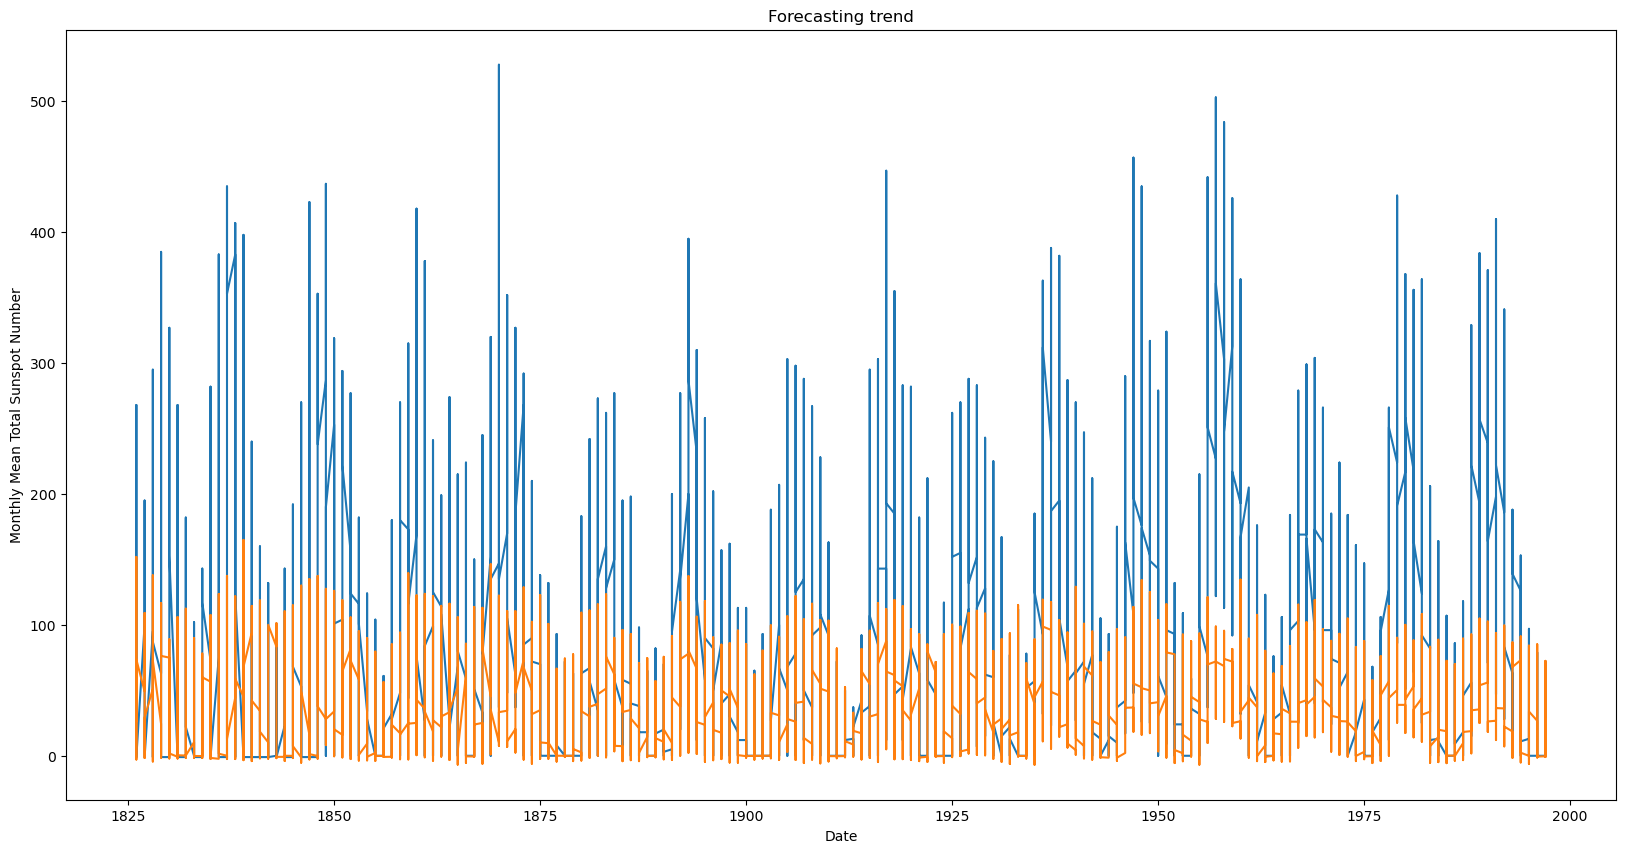

In [271]:
#Visualization of the entire dataset
plt.figure(figsize=(20,10))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.show()

In [272]:
results = np.array(rnn_forecast)

In [273]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

57.94799

# Conslusion
Our tuning was successful, and the score improved significantly after tuning models 1 = 48 and 2=58. It took a bit longer to train the first model because of a larger window and batch size. However, this led to better results. Our training time was also shortened by reducing the window size and batch size this time.

# RNN

In [277]:
time_data = df['year'].to_numpy()
series = df['sunspot_number'].to_numpy()

In [278]:
window_size = 100
batch_size = 256
shuffle_buffer_size = 1000

In [279]:
split_time = 3000
time_train = time_data[:split_time]
x_train = series[:split_time]

time_valid = time_data[split_time:]
x_valid = series[split_time:]

In [280]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

dataset = windowed_dataset(x_train, window_size=60, batch_size=64, shuffle_buffer=shuffle_buffer_size)

# Define the model

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, activation="relu", input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(64, return_sequences=True, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1),
])


model_3.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 64)          4224      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 dense (Dense)               (None, None, 32)          2080      
                                                                 
 dense_1 (Dense)             (None, None, 16)          528       
                                                                 
 dense_2 (Dense)             (None, None, 1)           17        
                                                                 
Total params: 15,105
Trainable params: 15,105
Non-trainable params: 0
_________________________________________________________________


In [281]:

%%time 
history = model_3.fit(dataset, epochs=100, verbose=1)

Epoch 1/100
46/46 [==============================] - 5s 40ms/step - loss: 11.4012 - mae: 11.7412
Epoch 2/100
46/46 [==============================] - 2s 35ms/step - loss: 10.5802 - mae: 10.9204
Epoch 3/100
46/46 [==============================] - 2s 32ms/step - loss: 10.2396 - mae: 10.5876
Epoch 4/100
46/46 [==============================] - 2s 34ms/step - loss: 9.7160 - mae: 10.0704
Epoch 5/100
46/46 [==============================] - 2s 39ms/step - loss: 8.9879 - mae: 9.3405
Epoch 6/100
46/46 [==============================] - 2s 32ms/step - loss: 8.1735 - mae: 8.5242
Epoch 7/100
46/46 [==============================] - 2s 31ms/step - loss: 7.5216 - mae: 7.8719
Epoch 8/100
46/46 [==============================] - 2s 31ms/step - loss: 6.9804 - mae: 7.3244
Epoch 9/100
46/46 [==============================] - 2s 31ms/step - loss: 6.5092 - mae: 6.8486
Epoch 10/100
46/46 [==============================] - 2s 33ms/step - loss: 6.0686 - mae: 6.4029
Epoch 11/100
46/46 [======================

46/46 [==============================] - 2s 34ms/step - loss: 2.8564 - mae: 3.1468
Epoch 87/100
46/46 [==============================] - 2s 34ms/step - loss: 2.8130 - mae: 3.1011
Epoch 88/100
46/46 [==============================] - 2s 34ms/step - loss: 2.7785 - mae: 3.0642
Epoch 89/100
46/46 [==============================] - 2s 35ms/step - loss: 2.7849 - mae: 3.0720
Epoch 90/100
46/46 [==============================] - 2s 36ms/step - loss: 2.7937 - mae: 3.0809
Epoch 91/100
46/46 [==============================] - 2s 35ms/step - loss: 2.8289 - mae: 3.1192
Epoch 92/100
46/46 [==============================] - 2s 34ms/step - loss: 2.7738 - mae: 3.0603
Epoch 93/100
46/46 [==============================] - 2s 32ms/step - loss: 2.8076 - mae: 3.0951
Epoch 94/100
46/46 [==============================] - 2s 31ms/step - loss: 2.7917 - mae: 3.0792
Epoch 95/100
46/46 [==============================] - 2s 31ms/step - loss: 2.7886 - mae: 3.0762
Epoch 96/100
46/46 [==============================] -

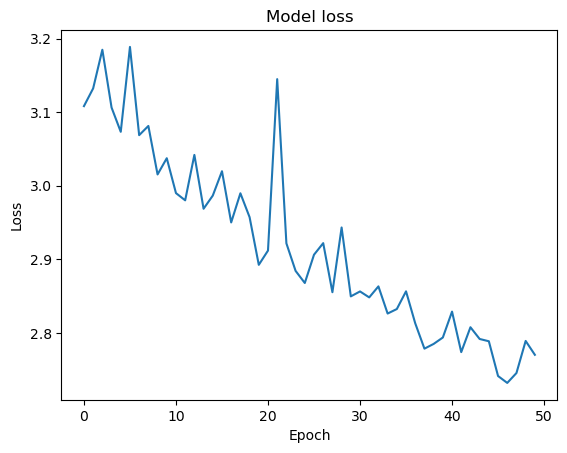

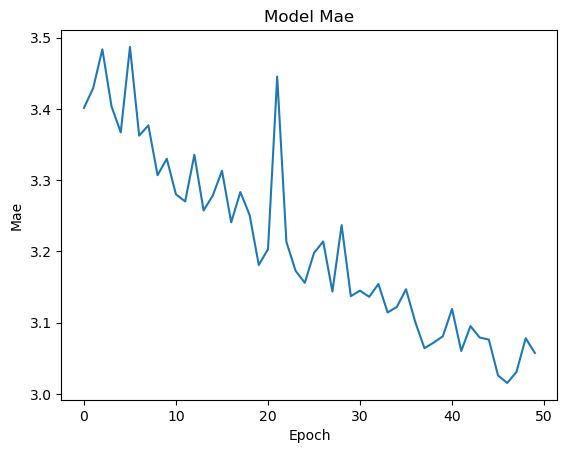

In [282]:
#Plotting loss values
plt.plot(history.history['loss'][50:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#Plotting mae values
plt.plot(history.history['mae'][50:])
plt.title('Model Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.show()

In [291]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [284]:
#Predict the result
rnn_forecast = model_forecast(model_3, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

2045/2045 [==============================] - 29s 14ms/step


In [305]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.title('Forecasting trend')
    plt.xlabel('year')
    plt.ylabel('Monthly Mean Total Sunspot Number')

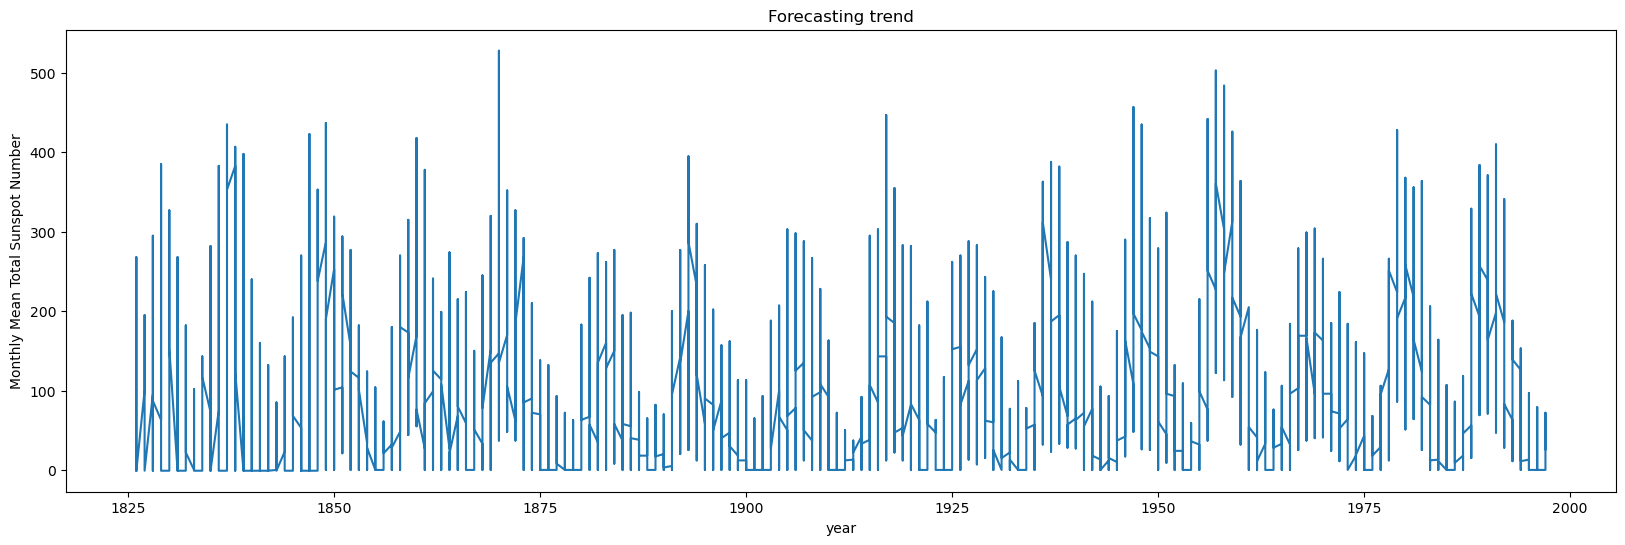

In [307]:
plt.figure(figsize=(20,6))
plot_series(time_valid[-len(sunspots_df):], x_valid[-len(sunspots_df):])

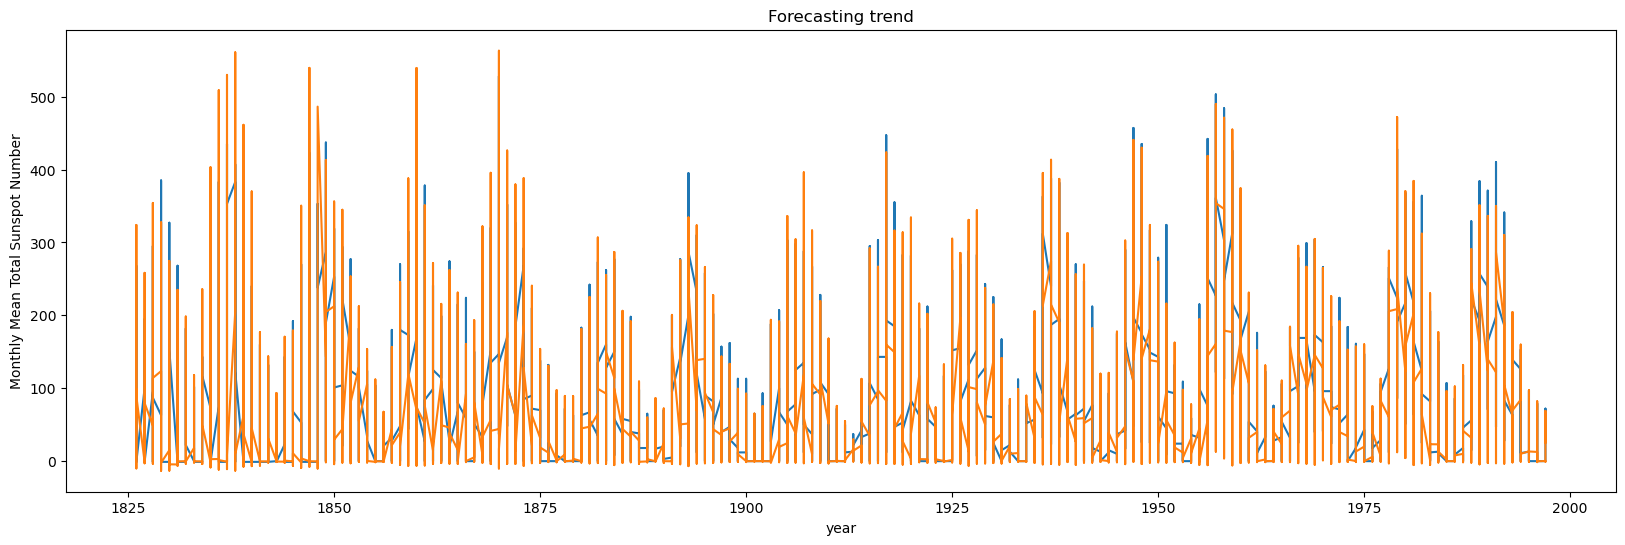

In [308]:
plt.figure(figsize=(20,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.show()

In [309]:
results = np.array(rnn_forecast)

In [310]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

33.937534

# Analyzing the differences between the two models
In 100 epochs, LMST had a mean absolute error of 58, and Simple RNN had a mean absolute error of 33.
The better model is Simple RNN